In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("/content/IRIS.csv")

In [79]:
df.shape

(150, 5)

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
# Checking the null values in the data frame

df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [82]:
# Checking the data types of the variables
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [83]:
# checking the value counts of features
for i in df.columns:
  print(df[i].value_counts())
  print("length", "=", len(df[i].value_counts()))
  print("="*100)

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64
length = 35
sepal_width
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64
length = 23
petal_length
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9   

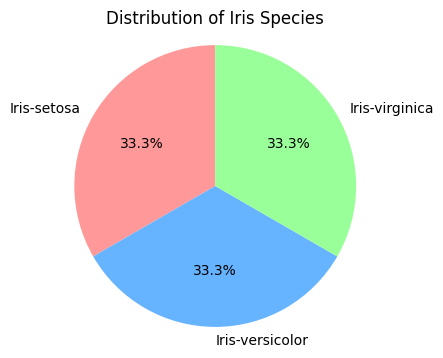

In [84]:
import matplotlib.pyplot as plt

# Data
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
counts = [50, 50, 50]

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=species, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Iris Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


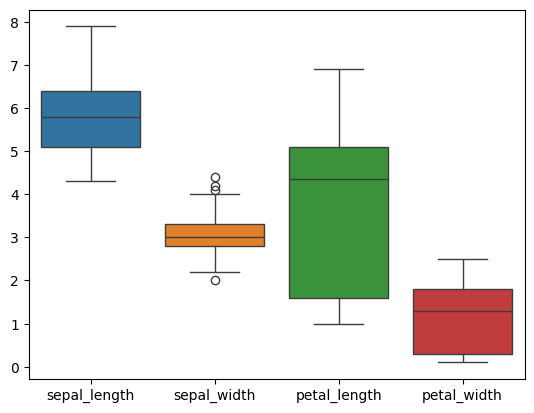

In [85]:
# outlier Analysis

sns.boxplot(df)
plt.show()

In [86]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

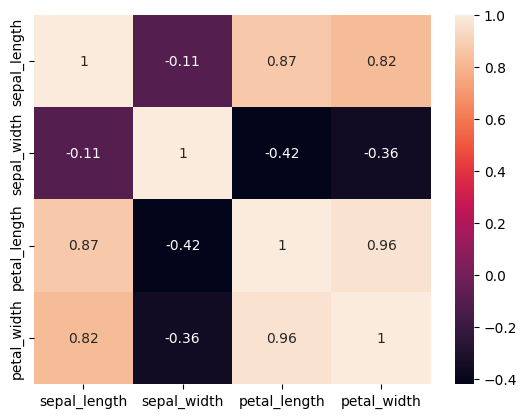

In [87]:
sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True)

In [88]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


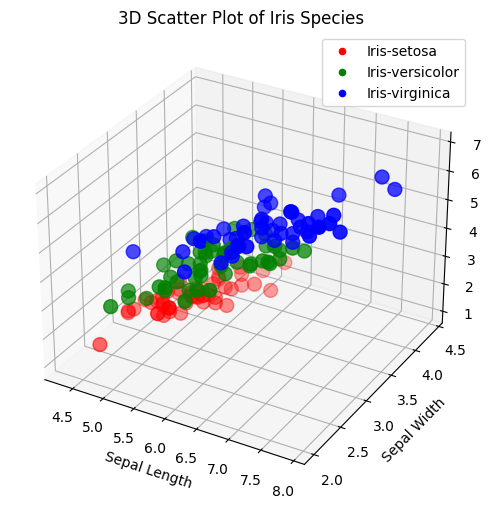

In [89]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on species
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'],
           c=[colors[species] for species in df['species']], s=100)

# Setting labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Species')

# Adding legend for species
species_unique = df['species'].unique()
for species in species_unique:
    ax.scatter([], [], [], color=colors[species], label=species)
ax.legend(loc='upper right')

plt.show()


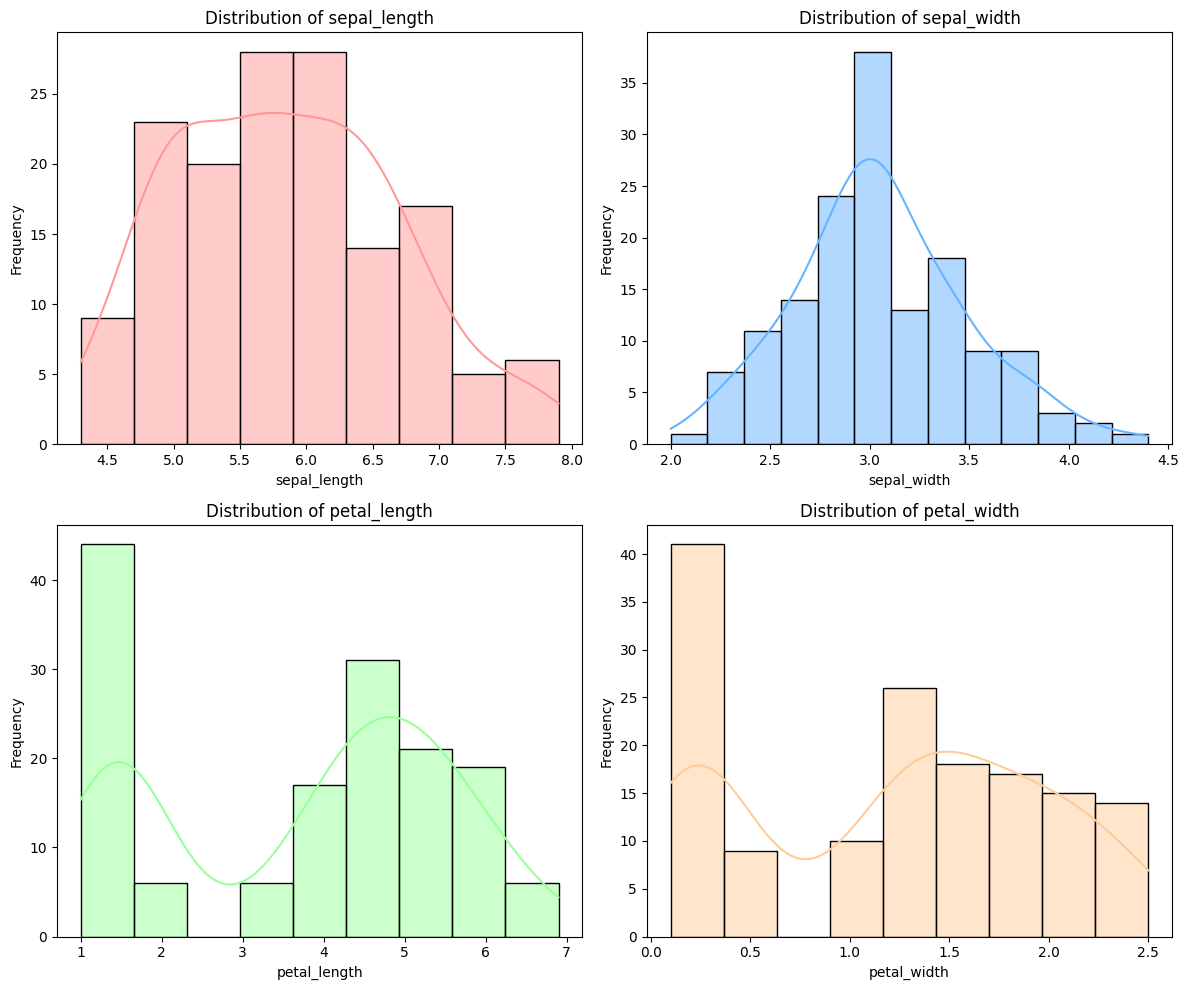

In [90]:

# Create a grid of 2 rows and 2 columns for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes to easily iterate over them
axes = axes.ravel()

# Define colors for each plot
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Loop through each column and plot
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for idx, feature in enumerate(col):
    sns.histplot(df[feature], ax=axes[idx], color=colors[idx], kde=True)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


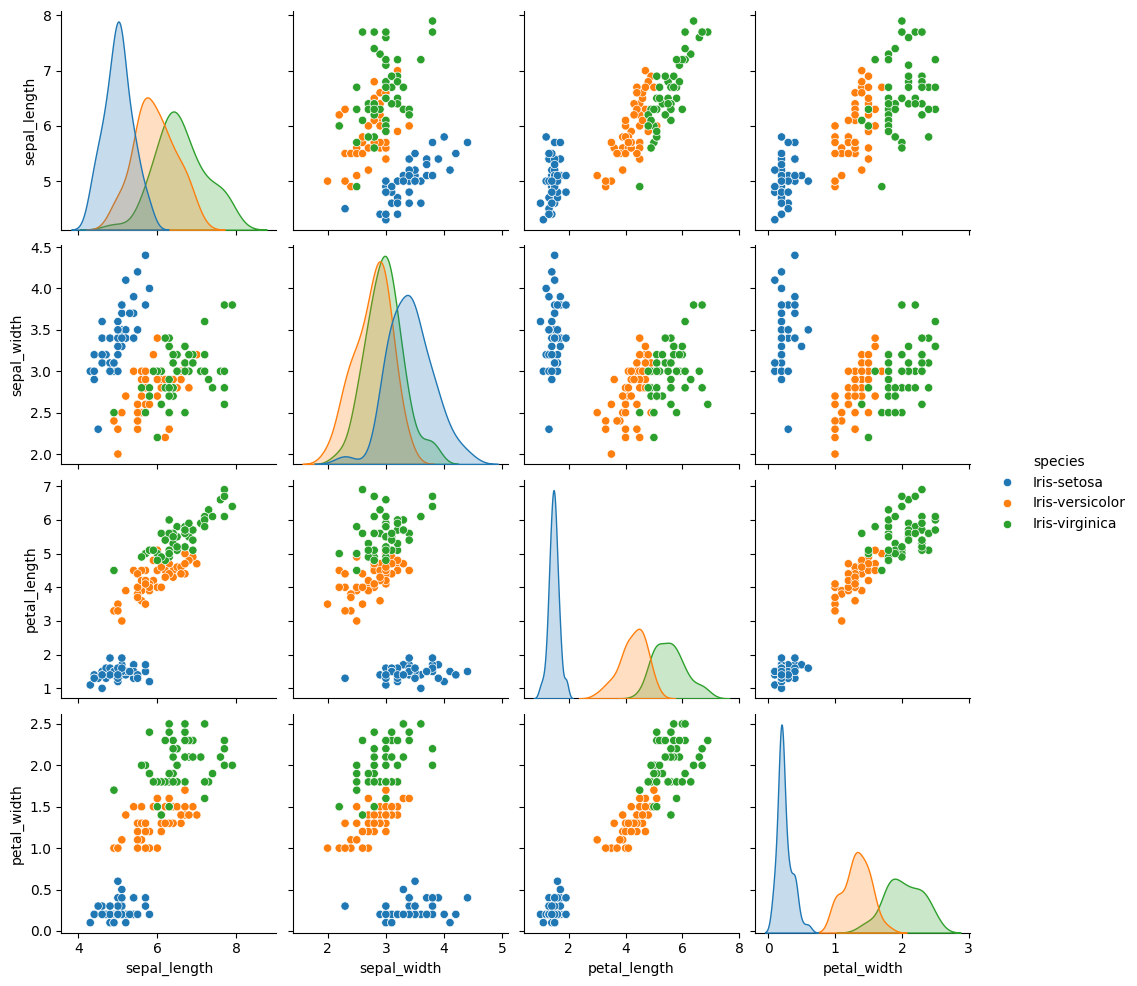

In [91]:
sns.pairplot(df, hue = "species")

# Data Modelling

In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'species' column
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Check the transformed column
print(df[['species', 'species_encoded']].head())


       species  species_encoded
0  Iris-setosa                0
1  Iris-setosa                0
2  Iris-setosa                0
3  Iris-setosa                0
4  Iris-setosa                0


In [93]:
df["species_encoded"].value_counts()

,count
species_encoded,
0,50
1,50
2,50


In [94]:
df1 = df.copy()

In [95]:
df1.drop("species", axis = 1, inplace = True)

In [96]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting of data into target and independent variables

In [97]:
X = df1.drop("species_encoded", axis = 1)
y = df1["species_encoded"]

In [98]:
y.head()

,species_encoded
0,0
1,0
2,0
3,0
4,0


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [102]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_pred = logreg.predict(X_test)

 Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



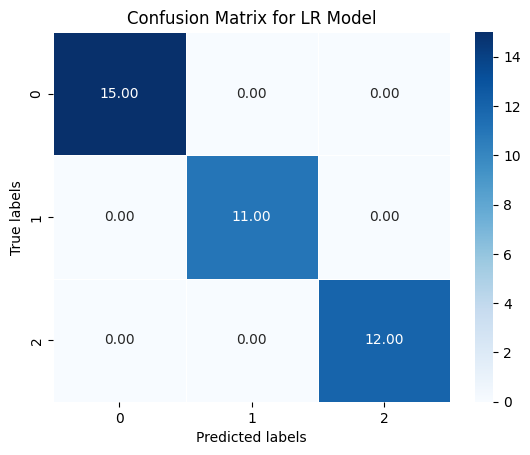

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Model's performance evaluating
accuracy = accuracy_score(y_test, y_pred)
print(f' Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",cmap="Blues",linewidth=0.5)
plt.title('Confusion Matrix for LR Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Using k nearest neighbour



Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:


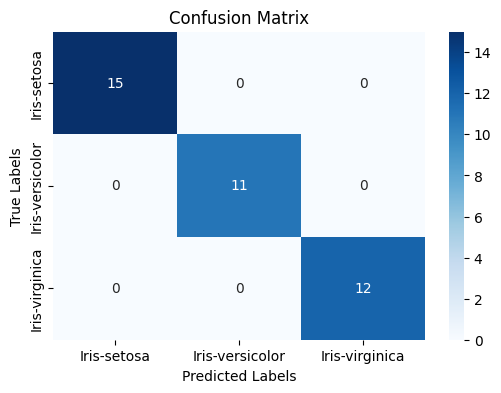

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize the KNN classifier with k=5 (you can adjust k as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred_1 = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_1)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred_1))

conf_matrix = confusion_matrix(y_test, y_pred_1)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



# using Decision tree

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



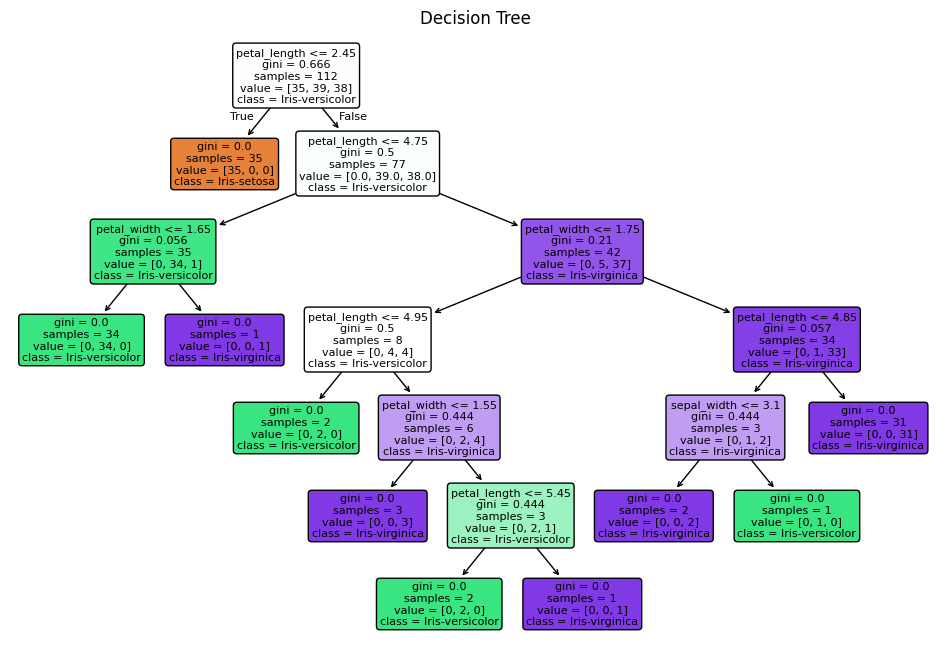

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_2 = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_2)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred_2))

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Decision Tree")
plt.show()


Confusion Matrix:


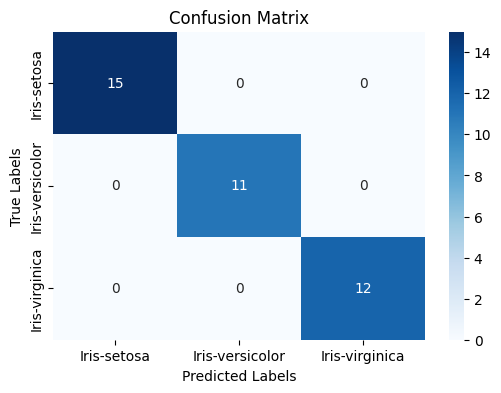

In [107]:
conf_matrix = confusion_matrix(y_test, y_pred_2)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# As we can see all the model predicting 100 % accuracy here means all our model is predicting well